In [49]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('./deeplearning.mplstyle')
import math

In [7]:
x_train = np.array([1.0, 2.0]) # x的数值
y_train = np.array([300.0, 500.0]) # y的数值
print(f"x_train = {x_train}") # f表达式代表打印{}里的值
print(f"y_train = {y_train}")

x_train = [1. 2.]


In [8]:
print(f"x_train.shape={x_train.shape}") # 训练集x的数量

x_train.shape=(2,)


In [10]:
i=0
x_i=x_train[i]
y_i=y_train[i]
print(f"x_i, y_i=({x_i}, {y_i})") # 打印两个数

x_i, y_i=(1.0, 300.0)


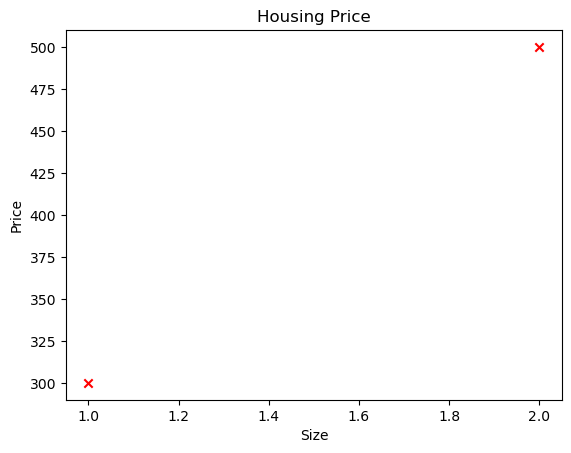

In [14]:
# 作图
plt.scatter(x_train, y_train, marker = 'x', c='r')
# 加标题
plt.title("Housing Price")
# 加y轴label
plt.ylabel("Price")
# 加x轴label
plt.xlabel("Size")
plt.show() # 不加这行命令的话也会显示图片

In [36]:
#设定参数
w = 100
b = 100

In [37]:
def compute_model_output(x, w, b):
    """
    用于计算linear model的预测值
    参数：
        x：有m个example的array
        w，b：常数
    返回：
        f_wb：模型的预测值
    """
        
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w*x[i]+b
    return f_wb
    

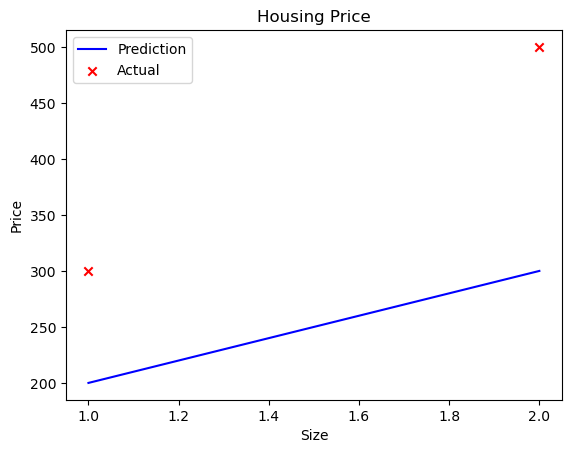

In [38]:
tmp_f_wb = compute_model_output(x_train, w, b, )
# 作图，x轴为x，y轴为prediction
plt.plot(x_train,tmp_f_wb, c='b', label = "Prediction")
# 训练集数据的图
plt.scatter(x_train, y_train, marker = 'x', c = 'r', label = "Actual")
# 加标题
plt.title("Housing Price")
# 加y轴label
plt.ylabel("Price")
# 加x轴label
plt.xlabel("Size")
# 加图示
plt.legend()
# show
plt.show()

In [40]:
# cost函数
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = w*x[i]+b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1/(2*m)*cost
    
    return total_cost

In [42]:
# 计算梯度
def compute_gradient(x, y, w, b):
    """
    计算linear regression的gradient
    参数：
        x(ndarray(m,)): 数据，有m个观测值
        y(ndarray(m,)): 目标数据
        w, b:模型参数
    返回值：
        dj_dw: gradient wrt w
        dj_db: gradient wrt b
    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i]) 
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [52]:
# 梯度下降
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    通过梯度下降fit w和b
    num_iters次gradient，learning rate alpha，update w和b
    参数：
        x(ndarray(m,)): 数据，有m个观测值
        y(ndarray(m,)): 目标数据
        w_in, b_in:模型初始参数
        alpha: learning rate
        num_iters: 重复次数
        cost_function: 计算cost的函数
        gradient_function： 计算gradient的函数
    返回值：
        w：通过梯度下降update的w
        b：通过梯度下降update的b
        J_history: cost value的历史数值
        p_history: [w, b]的历史数值
    """
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # 计算梯度，update参数
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        # 梯度下降更新w和b
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # 保存每一步的j
        if i<100000: 
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        
        # 每10次打印cost
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost{J_history[-1]:0.2e}",
                 f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}",
                 f"w: {w:0.3e}, b: {b: 0.5e}")
    return w, b, J_history, p_history

In [55]:
# 参数初始化
w_init = 0 
b_init = 0

# 梯度下降参数
iterations = 10000
tmp_alpha = 1.0e-2

# 实施梯度下降
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost7.93e+04 dj_dw: -6.500e+02, dj_db: -4.000e+02 w: 6.500e+00, b:  4.00000e+00
Iteration 1000: Cost3.41e+00 dj_dw: -3.712e-01, dj_db:  6.007e-01 w: 1.949e+02, b:  1.08228e+02
Iteration 2000: Cost7.93e-01 dj_dw: -1.789e-01, dj_db:  2.895e-01 w: 1.975e+02, b:  1.03966e+02
Iteration 3000: Cost1.84e-01 dj_dw: -8.625e-02, dj_db:  1.396e-01 w: 1.988e+02, b:  1.01912e+02
Iteration 4000: Cost4.28e-02 dj_dw: -4.158e-02, dj_db:  6.727e-02 w: 1.994e+02, b:  1.00922e+02
Iteration 5000: Cost9.95e-03 dj_dw: -2.004e-02, dj_db:  3.243e-02 w: 1.997e+02, b:  1.00444e+02
Iteration 6000: Cost2.31e-03 dj_dw: -9.660e-03, dj_db:  1.563e-02 w: 1.999e+02, b:  1.00214e+02
Iteration 7000: Cost5.37e-04 dj_dw: -4.657e-03, dj_db:  7.535e-03 w: 1.999e+02, b:  1.00103e+02
Iteration 8000: Cost1.25e-04 dj_dw: -2.245e-03, dj_db:  3.632e-03 w: 2.000e+02, b:  1.00050e+02
Iteration 9000: Cost2.90e-05 dj_dw: -1.082e-03, dj_db:  1.751e-03 w: 2.000e+02, b:  1.00024e+02
(w,b) found by gradient descent: (199.99

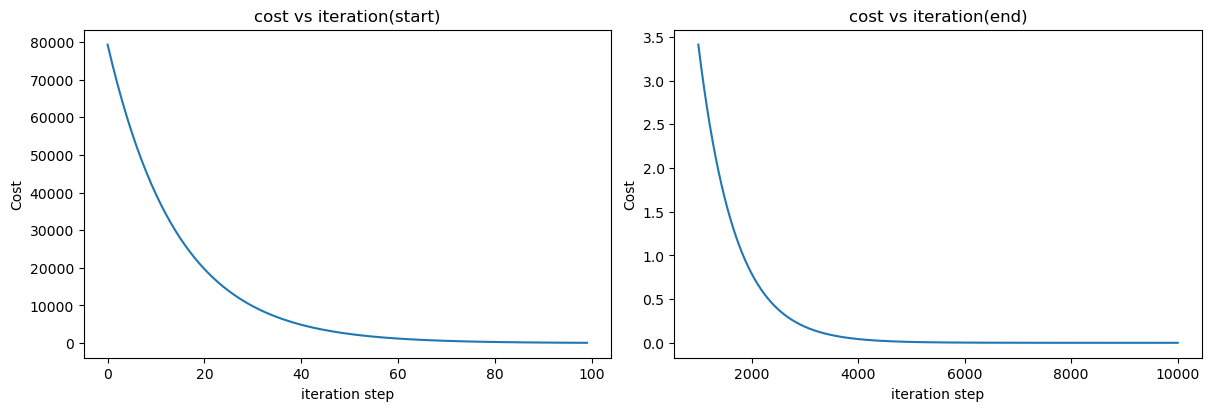

In [57]:
# 作图，cost vs 重复
# 1行2列的子图布局，约束布局为True，图形窗口的尺寸为(12, 4)
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, figsize = (12, 4))
# 取序列的前100个元素
ax1.plot(J_hist[:100])
# 从1000开始
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("cost vs iteration(start)")
ax2.set_title("cost vs iteration(end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [58]:
# 打印预测值
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
